# Particle Physics Exercise - Dimuon spectra at the LHC - Working notebook

This is the working notebook for this exercise. Let's review the main tasks that you will complete here:



1. To get more familiar with how these events look like inside the CMS detector, several event displays can be seen [here](http://opendata.cern.ch/record/303). Play with this tool and get to know how this physics topology looks like.

1. Then, look at the data samples. These files contain preselected events with mostly two or more muons. Compute the invariant mass of the two muons in the files and try to reproduce the dimuon spectra.

1. Now, let's concentrate in the Z boson. MonteCarlo simulations of this process is also provided. Here, your first task is to determine which trigger (or set of triggers) are the best to use in data. The triggers are a set of filters that are used during the data taking to a priori select interesting events.

1. Once you learn which triggers are the best to your signal, study the MC simulations further to identify if any additional kinematic variables can be used to enhance your signal. Can your selection be more optimal? Look at the dimuon spectrum and see if the shape of your signal can be improved.

1. Apply these set of selections (triggers+kinematics) to the data and plot again the dimuon spectra in the Z boson region (Dimuon mass above 50 GeV). Then, we need to model the background and signal components with functional forms. Try to model the background (falling part of the specrta) with a exponential-like function and the signal (peak) with a gaussian or double crystal function. (If you have problems with the signal part, you can use the MC simulations properly scaled to the cross section and luminosity) 

1. After modelling the signal and the background, compute the cross section of the Z boson. How does this compared to the Z boson cross section from the [this measurement](http://cms-results.web.cern.ch/cms-results/public-results/publications/SMP-12-011/index.html)?

1. If you have more time, you can also compared the Z boson mass and width with the numbers in the paper.

## Setup

You can use the conda environment provided in the pre-exercises of the school. In case you want to create a specific conda environment for this exercise (not recommended), there is a yml file with the package that you need for this exercise. Then you can install it as
`conda env create -f HEX_env.yml`
After following this installation, you can activate your environment as:
`conda activate epic2021`

In [ ]:
## # Uncomment these lines if you want to tst if you have all the libraries needed.
## ! pip install numpy pandas scipy matplotlib

## Additional information 

### Amount of data (in terms of integrated luminosity)

| Mean Center-of-Mass Energy [TeV] | 8.0 |
| -- | -- |
|Integrated Luminosity [pb$^{1}$] | 4429.37 |
|Number of generated events in simulation | 30458871 |
|Simulation cross section [pb] | 3503.71 |

### Datasets

The data and simulations for this exercise was taken/simulated by the CMS detector in 2012, when the LHC was running at a center of mass energy of 8 TeV. The data was collected with triggers where at least one muon was present. These datasets are part of the [CMS Open Data project](https://opendata.cern.ch/search?page=1&size=20&experiment=CMS).

The datasets for this project are located in [Zenodo](https://zenodo.org/record/5345875). They are stored in two formats: `csv` and `pkl`. You can use the format that fits you the best (you dont need to use both). 
 * Data: [csv](https://zenodo.org/record/5345875/files/DataFiles_csv.tar.gz?download=1), [pkl](https://zenodo.org/record/5345875/files/DataFiles_pkl.tar.gz?download=1)
 * Simulation: [csv](https://zenodo.org/record/5345875/files/SimulationFiles_csv.tar.gz?download=1), [pkl](https://zenodo.org/record/5345875/files/SimulationFiles_pkl.tar.gz?download=1)

Notice that the size of csv files are much bigger than the pkl files, but they are very generic (i.e. they can be opened with any programming language). The pkl files are smaller but you might need specific `python`/`pandas` version to open them. 

*Technical information* 
* The data and simulations that you will access **are** the datasets used in real CMS analyses, and therefore they are big and can take a lot of time to process everything. In this case, you can try to play with multithread tools in python (advance) or just use a few files when you test your code and then run it over all the files once you are confident that your code works. 
* The data for big experiments is very complex, and even though the files provided here are simplified, you might also need to open them with the `multindex` feature of pandas. As:
```
pandas.read_csv('output_data.csv', index_col=['entry','subentry'])
```

The variables included in the datasets are:

| Variable | Type | Description |
| :- | :: | -- |
| run |	int | Run number |
| luminosityBlock |	unsigned int | Luminosity block number |
| event | unsigned long | Event number |
| HLT_*** |	bool | Flag indicating whether the event passed the respective trigger |
| PV_npvs |	int | Number of primary vertices |
| nMuon | unsigned int | Number of muons in this event |
| Muon_pt |	float[nMuon] | Transverse momentum of the muons |
| Muon_eta | float[nMuon] | Pseudorapidity of the muons |
| Muon_phi | float[nMuon] | Azimuth angle of the muons |
| Muon_mass | float[nMuon] | Mass of the muons |
| Muon_charge |	int[nMuon] | Charge of the muons (either 1 or -1) |
| Muon_softId |	bool[nMuon] | Muon object identification with soft requirements. More information in [2] |
| Muon_tightId | bool[nMuon] | Muon object identification with tight requirements. More information in [2] |
| Muon_pfRelIso03_all |	float[nMuon] | Muon isolation divided by the transverse momentum in the R=0.3R=0.3 cone. More information in [2] |
| Muon_pfRelIso04_all |	float[nMuon] | Muon isolation divided by the transverse momentum in the R=0.4R=0.4 cone. More information in [2] |
| Muon_genPartIdx |	int[nMuon] | Indices for the muons pointing to the related objects in the generator particle collection |
| MET_pt | float | Missing transverse energy |
| MET_phi | float | Azimuth angle of the missing transverse energy |
| nGenPart | unsigned int | Number of stored generator particles |
| GenPart_pt | float[nGenPart] | Transverse momentum of the generator particles |
| GenPart_eta | float[nGenPart] | Pseudorapidity of the generator particles |
| GenPart_phi | float[nGenPart] | Azimuth angle of the generator particles |
| GenPart_mass | float[nGenPart] | Mass of the generator particles |
| GenPart_pdgId | int[nGenPart] | Particle identification number of the generator particles |

## Exercise

### Part 1
**To get more familiar with how these events look like inside the CMS detector, several event displays can be seen [here](http://opendata.cern.ch/record/303). Play with this tool and get to know how this physics topology looks like.**

An example of these type of events can be seen here:
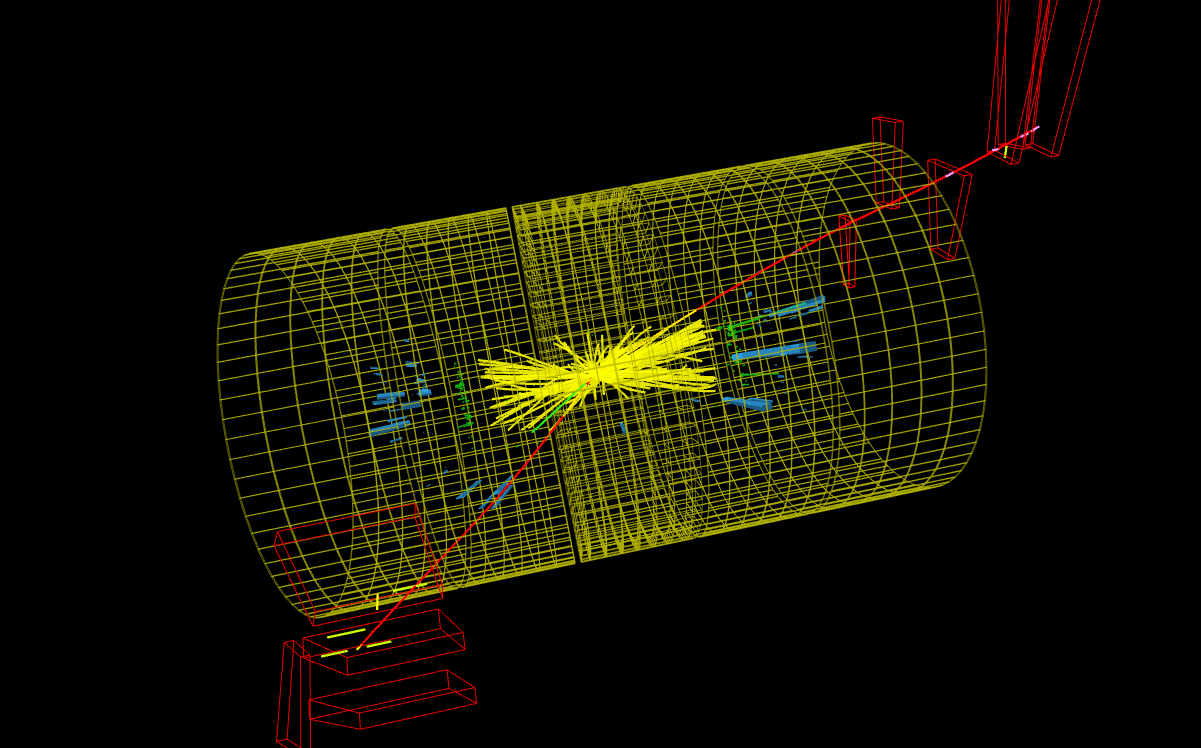

### Part 2

**Then, look at the data samples. These files contain preselected events with mostly two or more muons. Compute the invariant mass of the two muons in the files and try to reproduce the dimuon spectra.** 

Let's download the files that we need for this exercise:
(_Keep in mind that these process takes quite some time. Do it only once per session_)

In [ ]:
#### For the first time only. These lines will download 2.1 Gb of data
# ! wget https://zenodo.org/record/5345875/files/DataFiles_pkl.tar.gz
# ! tar -xvf DataFiles_pkl.tar.gz
# ! mv pkl/ sample_data/
# ! rm -rf DataFiles_pkl.tar.gz pkl/ 
# ! ls -lr

Let's import the python libraries that we will use:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, optimize
from os import listdir
from os.path import isfile, join

Let's import all the data files into a pandas dataframe:

In [ ]:
datafiles = [ 'sample_data/'+f for f in listdir('sample_data/') if f.startswith('output_data') ][:10]  ### [:10] to select only the first 10 files. Remove it if you want to use the entire dataset. It will be computing expensive.

dataframeList = []
for ifile in datafiles: dataframeList.append( pd.DataFrame( pd.read_pickle(ifile) ) )

dfData = pd.concat(dataframeList, ignore_index=True)
dfData

It is always a good idea to check basic numbers of your dataset:

In [ ]:
dfData.describe()

For that we can first introduce some simple selection, and remove events without two muons:

In [ ]:
dfDataTwoMuons = dfData[ dfData.groupby('event')['run'].transform('size').eq(2) ].reset_index(drop=True)      ### subset of data with only 2 muons
dfDataTwoMuons = dfDataTwoMuons.set_index( ['event', dfDataTwoMuons.groupby('event').cumcount()] )

### dfDataTwoMuons = dfData[ dfData.nMuon == 2 ]   ### this will not work, why?

dfDataTwoMuons.head(10)

Let's calculate the invariant mass of two muons in our dataset:

In [ ]:
Muon1 = dfDataTwoMuons.loc[pd.IndexSlice[:,0],:][['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass']].reset_index(drop=True)
Muon2 = dfDataTwoMuons.loc[pd.IndexSlice[:,1],:][['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass']].reset_index(drop=True)

assert len(Muon1) == len(Muon2)    ## sanity check

InvMass = np.sqrt( 2 * Muon1.Muon_pt * Muon2.Muon_pt * ( np.cosh( Muon1.Muon_eta - Muon2.Muon_eta ) \
                                                        - np.cos( Muon1.Muon_phi - Muon2.Muon_phi ) ) )
InvMass

In [ ]:
nbins = 30000
rng = [0.25, 300]
fig, ax = plt.subplots()
plt.hist(InvMass, bins=nbins, range=rng, histtype="step", color="b")
ax.set_xlim(left=0.25)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$m_{\mu\mu} (GeV)$")
ax.set_ylabel("$N_{events}$")
plt.show()

How does your plot compare to the CMS measurement? Can you identify the particles that you find? 


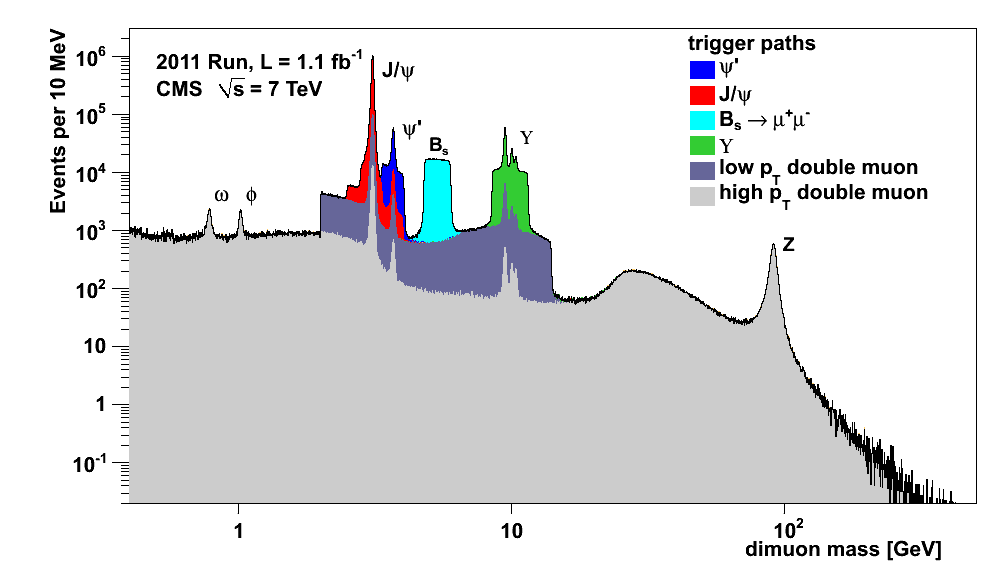

### Part 3
**Now, let's concentrate in the Z boson. MonteCarlo simulations of this process is also provided. Here, your first task is to determine which trigger (or set of triggers) are the best to use in data. The triggers are a set of filters that are used during the data taking to a priori select interesting events.**

Let's download the simulation samples:

In [ ]:
##### For the first time only 
# ! wget https://zenodo.org/record/5345875/files/SimulationFiles_pkl.tar.gz
# ! tar -xvf SimulationFiles_pkl.tar.gz
# ! mv pkl/ sample_sim/
# ! rm -rf SimulationFiles_pkl.tar.gz pkl/ 
# ! ls -lr

In [ ]:
#### Let's use the csv files to create a pandas dataframw
simfiles = [ 'sample_sim/'+f for f in listdir('sample_sim/') if f.startswith('output_sim') ][:10]  ### [:10] to select only the first 10 files. Remove it if you want to use the entire dataset. It will be computing expensive.

simframeList = []
for ifile in simfiles: simframeList.append( pd.DataFrame( pd.read_pickle(ifile) ) )

dfSim = pd.concat(simframeList, ignore_index=True)
dfSim

Because we will concentrate con events with a Z boson, we can introduce some minimal kinematic selections. In this case muons with $pt > 20 $ GeV and $|\eta| < 2.5$ are basic selections.

In [ ]:
dfSimTwoMuons = dfSim[ (dfSim.Muon_pt > 20 ) & (np.abs(dfSim.Muon_eta)< 2.5) ]                     ### applying basic selection
dfSimTwoMuons = dfSimTwoMuons[ dfSimTwoMuons.groupby('event')['run'].transform('size').eq(2) ].reset_index(drop=True)      ### subset of Sim with only 2 muons
dfSimTwoMuons = dfSimTwoMuons.set_index( ['event', dfSimTwoMuons.groupby('event').cumcount()] )

dfSimTwoMuons.head(10)

Because we are going to concentrate in the trigger columns. Let's check the names of the triggers and create a reduced dataset with those columns:

In [ ]:
namesOfTriggers = [ t for t in dfSimTwoMuons.columns.to_list() if t.startswith('HLT') ]
namesOfTriggers

Let's create a subset of the `dfSim` dataframe that contains only triggers used.

In [ ]:
dfSimTriggers = dfSimTwoMuons[namesOfTriggers].loc[ (slice(None),0), namesOfTriggers ].droplevel(level=1)
dfSimTriggers #.head()

By summing the boolean values, and sorting them, you can check which triggers were fired the most.

In [ ]:
dfSimTriggers.sum().sort_values(ascending=False)

From the previous list, let's use triggers with at least two muons:

In [ ]:
listOfTriggersFired = dfSimTriggers.sum().sort_values(ascending=False)[2:7].index.to_list()
listOfTriggersFired

### Part 4
**Once you learn which triggers are the best to your signal, study the MC simulations further to identify if any additional kinematic variables can be used to enhance your signal. Can your selection be more optimal? Look at the dimuon spectrum and see if the shape of your signal can be improved.**

Let's use the triggers that we identify in the previous example:

In [ ]:
dfSimTwoMuonsTrigger = dfSimTwoMuons[dfSimTwoMuons[(listOfTriggersFired)].any(axis=1)]
dfSimTwoMuonsTrigger

As a sanity check, let's plot some basic quantities for the muons:

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax[0].hist(dfSimTwoMuonsTrigger['Muon_pt'][:,0], bins=20, range=[0, 200], histtype="step", color="b")
ax[0].set_xlabel("Leading Muon pt (GeV)")
ax[0].set_ylabel("$N_{events}$")
ax[1].hist(dfSimTwoMuonsTrigger['Muon_pt'][:,1], bins=20, range=[0, 200], histtype="step", color="r")
ax[1].set_xlabel("2nd Leading Muon pt (GeV)")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax[0].hist(dfSimTwoMuonsTrigger['Muon_eta'][:,0], bins=20, range=[-3, 3], histtype="step", color="b")
ax[0].set_xlabel("Leading Muon eta")
ax[0].set_ylabel("$N_{events}$")
ax[1].hist(dfSimTwoMuonsTrigger['Muon_eta'][:,1], bins=20, range=[-3, 3], histtype="step", color="r")
ax[1].set_xlabel("2nd Leading Muon eta")
plt.show()

Now we can compute again the invariant mass of the two muons, and make a plot:

In [ ]:
Muon1 = dfSimTwoMuonsTrigger.loc[pd.IndexSlice[:,0],:][['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass']].reset_index(drop=True)
Muon2 = dfSimTwoMuonsTrigger.loc[pd.IndexSlice[:,1],:][['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass']].reset_index(drop=True)

assert len(Muon1) == len(Muon2)    ## sanity check

InvMass = np.sqrt( 2 * Muon1.Muon_pt * Muon2.Muon_pt * ( np.cosh( Muon1.Muon_eta - Muon2.Muon_eta ) \
                                                        - np.cos( Muon1.Muon_phi - Muon2.Muon_phi ) ) )
InvMass

In [ ]:
nbins = 300
rng = [50, 150]
fig, ax = plt.subplots()
plt.hist(InvMass, bins=nbins, range=rng, histtype="step", color="b")
ax.set_xlabel("$m_{\mu\mu} (GeV)$")
ax.set_ylabel("$N_{events}$")
plt.show()

_Extra task_: Are there any other Muon variables that can help to have a cleaner (smaller width) signal? You can draw some of the Muon variables and play with them.

### Part 5
**Apply these set of selections (triggers+kinematics) to the data and plot again the dimuon spectra in the Z boson region (Dimuon mass above 50 GeV). Then, we need to model the background and signal components with functional forms. Try to model the background (falling part of the specrta) with a exponential-like function and the signal (peak) with a gaussian or double crystal function. (If you have problems with the signal part, you can use the MC simulations properly scaled to the cross section and luminosity)**

Let's apply the selection that we identify in Part 4. We are adding other requierements that are common in our datasets (`PV_npvs>=1`) and a muon isolation requirement.

In [ ]:
kinSel = (dfData.PV_npvs >= 1) & (dfData.Muon_pt > 25 ) & (np.abs(dfData.Muon_eta)< 2.1)\
            & (dfData.Muon_pfRelIso03_all < 0.12) & (dfData.Muon_tightId == True)

muonColumns = [ x for x in dfData.columns.to_list() if x.startswith('Muon') ]     ### list of Muon variables

dfDataKin = dfData[ kinSel ]
dfDataKinTrig = dfDataKin[dfDataKin[(listOfTriggersFired)].any(axis=1)][muonColumns + [ 'event', 'run', 'luminosityBlock']]
dfDataKinTrigTwoMuons = dfDataKinTrig[ dfDataKinTrig.groupby('event')['run'].transform('size').eq(2) ].reset_index(drop=True)

dfDataKinTrigTwoMuons = dfDataKinTrigTwoMuons.set_index( ['event', dfDataKinTrigTwoMuons.groupby('event').cumcount()] )

dfDataKinTrigTwoMuons.head()

In [ ]:
Muon1 = dfDataKinTrigTwoMuons.loc[pd.IndexSlice[:,0],:][muonColumns].reset_index()
Muon2 = dfDataKinTrigTwoMuons.loc[pd.IndexSlice[:,1],:][muonColumns].reset_index()
assert len(Muon1) == len(Muon2)    ## sanity check

charge = np.where( Muon1.Muon_charge == Muon2.Muon_charge, False, True )
Muon1 = Muon1[charge]
Muon2 = Muon2[charge]

diMuon = pd.merge( Muon1, Muon2, on='event', suffixes=['_1', '_2'] )
diMuon

As a sanity check, let's make some plots of some quantities

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax[0].hist(diMuon['Muon_pt_1'], bins=20, range=[0, 200], histtype="step", color="b")
ax[0].set_xlabel("Leading Muon pt (GeV)")
ax[0].set_ylabel("$N_{events}$")
ax[1].hist(diMuon['Muon_pt_2'], bins=20, range=[0, 200], histtype="step", color="r")
ax[1].set_xlabel("2nd Leading Muon pt (GeV)")
plt.show()

Let's compute the final invariant mass (after all the selections)

In [ ]:
finalInvMass = np.sqrt( 2 * diMuon.Muon_pt_1 * diMuon.Muon_pt_2 * ( np.cosh( diMuon.Muon_eta_1 - diMuon.Muon_eta_2 ) \
                                                        - np.cos( diMuon.Muon_phi_1 - diMuon.Muon_phi_2 ) ) )
finalInvMass

In [ ]:
nbins = 80
rng = [80, 100]
fig, ax = plt.subplots()
y_bins, x_bins, _ = plt.hist(finalInvMass, bins=nbins, range=rng, histtype="step", color="b")
# ax.set_xlim(left=50)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$m_{\mu\mu} (GeV)$")
ax.set_ylabel("$N_{events}$")
plt.show()

Let's make now some fits. We can assume that our signal part is gaussian-like:

In [ ]:
def model(x, gaussNorm, mu, sigma, expNorm, tau):
    res = (gaussNorm/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2 / (2*sigma**2)) + (expNorm*tau)*np.exp(-tau*x)
    return res

In [ ]:
bins_center = x_bins[:-1] + np.diff(x_bins) /2 

p0 = [45000, 90, 23, 5000, 5000]   ### these are initial parameters which are identified with trial and error.
bounds = ([0, 70, 0, 0, 0], [np.inf, 120, np.inf, np.inf, np.inf])

params, pcov = curve_fit(model, bins_center, y_bins, p0=p0, bounds=bounds, maxfev=1e6)
print('Fit parameters',params)

x_mass = np.linspace(80, 100, 1000)
plt.plot(bins_center, y_bins)
plt.plot(x_mass, model(x_mass, *params))
plt.show()

Instead of using a Gaussian function, let's try with a [Breit-Wigner function](http://www-ekp.physik.uni-karlsruhe.de/~feindt/BND_Feindt_2.pdf):

In [ ]:
def BreitWigner(x, norm, M, Gamma):
    gamma = np.sqrt(M**2 * (M**2+Gamma**2))
    k = 2 * np.sqrt(2)*M*Gamma*gamma/np.pi/np.sqrt(M**2+gamma)
    res = norm*k/((x**2-M**2)**2+M**2*Gamma**2)
    return res


p0 = [45000, 90, 10]
bounds = ([0, 70,0], [np.inf, 120, 100])

params, pcov = curve_fit(BreitWigner, bins_center, y_bins, p0=p0, bounds=bounds, maxfev=1e6)
print('Fit parameters',params)

x_mass = np.linspace(80, 100, 1000)
plt.figure(figsize=[12.8,9.6])
plt.plot(bins_center, y_bins)
plt.plot(x_mass, BreitWigner(x_mass, *params))
plt.yscale('log')
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

There are many python libraries available with specfic functionality for HEX. Some of this useful more advance libraries are [zfit](https://github.com/zfit/zfit) and [probfit](https://probfit.readthedocs.io/en/latest/index.html). Another useful package is called [uncertainties](https://pypi.org/project/uncertainties/).
I encourage you to try them if you are more interested in better fits.

In [ ]:
from scipy.integrate import quad

In [ ]:
norm = params[0]
M = params[1]
Gamma = params[2]
integral = quad(BreitWigner, 80, 100, args=(norm, M, Gamma))
integral[0]

To compute the cross section, one needs to compute the acceptance. We can compute this by checking the length of the simulation dataframes before and after all the selection. The value of the luminosity comes from the amount of data that you use.

In [ ]:
Acceptance = dfSimTwoMuonsTrigger.size/dfSim.size

lumi = 4429.37 #### (in pb)
XS = integral[0]/( lumi * Acceptance )

print(f'The computed cross section is {XS}')

The value that you compute now is definitely not correct. Keep in mind that we have not processed all the data samples (corresponding to the luminosity that we use in the computation). If you have more time, and good computing resources, you can try to run the exercise with the full dataset.